In [1]:
import pandas as pd

import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/dawid/Documents/hubquest_taxi/notebooks'

In [3]:
os.listdir("../data/raw")

['train_data.parquet',
 '.gitkeep',
 'test_data.parquet',
 'final_taxi_data.parquet']

In [4]:
# df = pd.read_parquet("../data/processed/train_data_processed.parquet")

# this is data from processing
df = pd.read_parquet("/Users/dawid/Desktop/data.parquet")

In [5]:
df

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,...,dt_weekday,dt_isweekend,dt_hour,dt_quarter,dt_day_part,dt_isusholiday,dt_paydays,dropoff_cluster,pickup_cluster,trip_info_cluster
0,1,3.90,-73.990479,40.750092,1,N,-73.948700,40.779205,16.5,0.5,...,6,True,0,3,midnight,False,True,1,8,28
1,1,2.86,-74.008583,40.719704,1,N,-73.984711,40.743496,11.5,0.5,...,6,True,0,3,midnight,False,True,0,5,34
2,6,3.20,-73.946808,40.776146,1,N,-73.987701,40.765270,15.5,0.5,...,6,True,0,3,midnight,False,True,2,1,38
3,1,0.50,-73.994316,40.746120,1,N,-73.989944,40.741764,4.5,0.5,...,6,True,0,3,midnight,False,True,0,8,36
4,1,1.15,-73.988503,40.718513,1,N,-73.978409,40.730988,6.0,0.5,...,6,True,0,3,midnight,False,True,14,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57938,1,0.50,-73.977196,40.752136,1,N,-73.982185,40.756977,4.5,0.0,...,6,True,9,3,late morning,False,False,2,0,40
57939,1,2.20,-73.954956,40.789017,1,N,-73.975288,40.761234,9.0,0.0,...,6,True,9,3,late morning,False,False,11,1,38
57940,1,1.01,-73.992897,40.730724,1,N,-73.979752,40.727158,7.0,0.0,...,6,True,9,3,late morning,False,False,14,14,2
57941,1,0.80,-73.989517,40.772987,1,N,-73.980278,40.765671,5.5,0.0,...,6,True,9,3,late morning,False,False,2,2,3


In [6]:
df_train = df.sample(frac=0.8, random_state=200)
df_test = df.drop(df_train.index)

df = df_train.copy()

In [7]:
train_cols = [
    "pickup_longitude",
    "pickup_latitude",
    "dropoff_longitude",
    "dropoff_latitude",
    "distance_braycurtis",
    "distance_chebyshev",
    "distance_cityblock",
    "distance_cosine",
    "distance_euclidean",
    "distance_sqeuclidean",
    "distance_haversine",
]

In [8]:
y = df["trip_distance"]
X = df[train_cols]

X_test = df_test[train_cols]

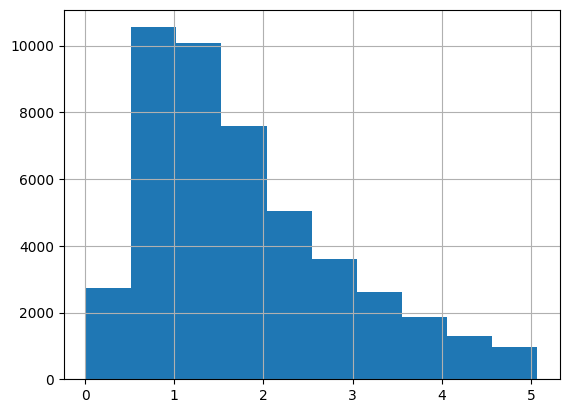

In [9]:
y.hist();

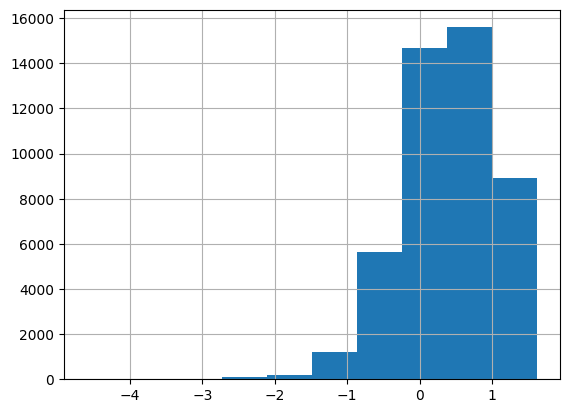

In [10]:
np.log(y).hist();

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

0.23157758387928973
0.14080257534452417
0.8803067140849692


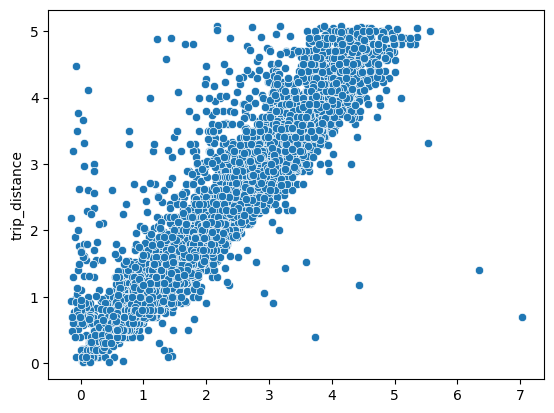

In [12]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_test)
y_true = df_test["trip_distance"]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(mae)
print(mse)
print(r2)

sns.scatterplot(x=y_pred, y=y_true);

0.19798294154970628
0.1049260778576364
0.9108045644319581


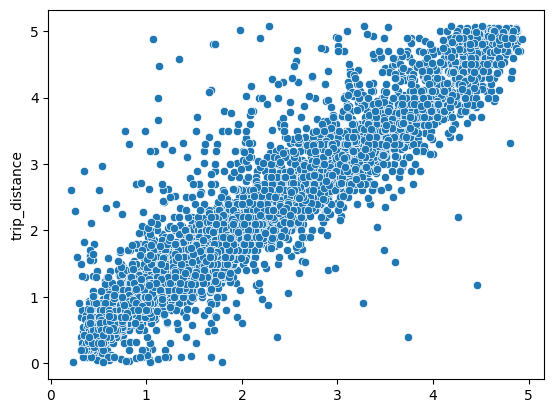

In [13]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=16, random_state=0)
model.fit(X, y)

y_pred = model.predict(X_test)
y_true = df_test["trip_distance"]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(mae)
print(mse)
print(r2)

sns.scatterplot(x=y_pred, y=y_true);

0.12568466880163606
0.0321495507604096
0.972560303009044


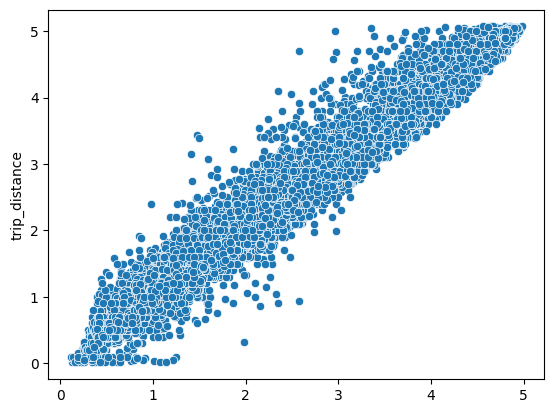

In [14]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=16, random_state=0)
model.fit(X, y)

y_pred = model.predict(X) #!!!!
y_true = df["trip_distance"]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(mae)
print(mse)
print(r2)

sns.scatterplot(x=y_pred, y=y_true);

0.2653253633410708
0.23016826069219634
0.8043388384893784


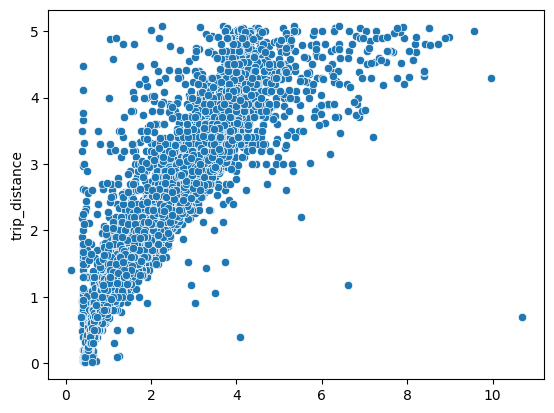

In [15]:
# Linear Regression for exp
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, np.log(y))

y_pred = model.predict(X_test)
y_pred = np.exp(y_pred)
y_true = df_test["trip_distance"]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(mae)
print(mse)
print(r2)

sns.scatterplot(x=y_pred, y=y_true);

In [41]:
# optimisation for model chosen Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=0)

params = {
    "n_estimators": [50, 100, 200], 
    "max_depth": [4, 8, 16, 32],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [2, 4, 8],
}

grid = GridSearchCV(estimator=model, param_grid=params, cv=3, n_jobs=-1)
grid.fit(X, y)

best_params = grid.best_params_
print(best_params)

{'max_depth': 32, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [64]:
"&".join(f"{k}={v}" for k, v in best_params.items())

'max_depth=32&min_samples_leaf=4&min_samples_split=2&n_estimators=200'

0.19448236864318744
0.10287574733780609
0.9125475069635836


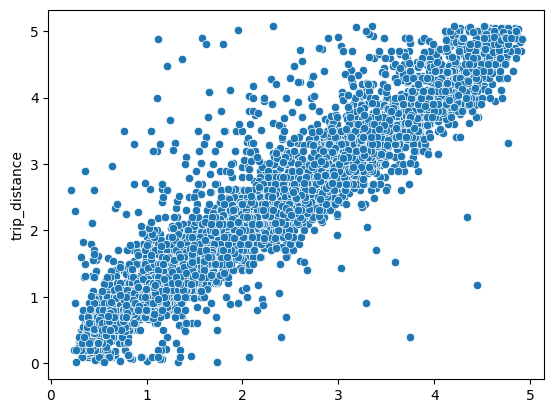

In [44]:
# Random Forest Regression

best_params.update({'random_state':0})

model = RandomForestRegressor(**best_params)
model.fit(X, y)

y_pred = model.predict(X_test)
y_true = df_test["trip_distance"]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(mae)
print(mse)
print(r2)

sns.scatterplot(x=y_pred, y=y_true);